#### Exploratory Analysis of Climate Scenarios Trade Risk  

Quantifies the amount of trade at-risk of imports and exports given a country dependency on ports for their trade.

Select a country, we can see the risks to every port that is responsible for handling German exports. 

In [1]:
import pandas as pd

In [2]:
Daily_Activity = pd.read_csv("Daily_Port_Activity_Data_and_Trade_Estimates.csv")

In [3]:
Daily_Activity.head()

,date,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
0,2019/10/28,2019,10,28,port1325,Tsuruga,Japan,JPN,0,0,...,291.640572,1090.885996,0.000000,0.000000,0.0,0.000000,19.697621,0.000000,19.697621,1
1,2019/10/29,2019,10,29,port1325,Tsuruga,Japan,JPN,0,0,...,213.367873,1012.613298,0.000000,0.000000,0.0,431.556326,19.697621,431.556326,451.253947,2
2,2019/10/30,2019,10,30,port1325,Tsuruga,Japan,JPN,0,1,...,46282.780466,46282.780466,0.000000,0.000000,0.0,431.556326,0.000000,431.556326,431.556326,3
3,2019/10/31,2019,10,31,port1325,Tsuruga,Japan,JPN,0,1,...,244.306270,244.306270,0.000000,2589.257419,0.0,431.556326,0.000000,3020.813745,3020.813745,4
4,2019/11/01,2019,11,1,port1325,Tsuruga,Japan,JPN,1,0,...,213.367873,213.367873,262.658908,0.000000,0.0,431.556326,0.000000,694.215234,694.215234,5


In [4]:
Aratu_2025 = Daily_Activity.loc[(Daily_Activity["portid"] == "port62") & (Daily_Activity["year"] == 2025)]

In [5]:
Aratu_2025.head()

,date,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
1807622,2025/02/02,2025,2,2,port62,Aratu,Brazil,BRA,0,1,...,48385.026400,48915.004843,0.0,0.0,0.0,0.0,3500.01151,0.0,3500.01151,1807623
1807626,2025/02/03,2025,2,3,port62,Aratu,Brazil,BRA,0,1,...,47891.044792,106373.020995,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,1807627
1807641,2025/01/01,2025,1,1,port62,Aratu,Brazil,BRA,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,1807642
1807642,2025/01/02,2025,1,2,port62,Aratu,Brazil,BRA,0,1,...,21080.947556,21080.947556,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,1807643
1807643,2025/01/03,2025,1,3,port62,Aratu,Brazil,BRA,0,0,...,0.000000,10531.407988,0.0,0.0,0.0,0.0,19443.13913,0.0,19443.13913,1807644


In [6]:
Ara25_import_cargo = Aratu_2025["import"].sum()

In [7]:
print("Total Import Volume for Port of Aratu in 2025:", f"{Ara25_import_cargo:.0f}", "metric tons.")


Total Import Volume for Port of Aratu in 2025: 6186782 metric tons.


In [8]:
Ara25_export_cargo = Aratu_2025["export"].sum()

In [9]:
print("Total Export Volume for Port of Aratu in 2025:", f"{Ara25_export_cargo:.0f}", "metric tons.")


Total Export Volume for Port of Aratu in 2025: 7426745 metric tons.


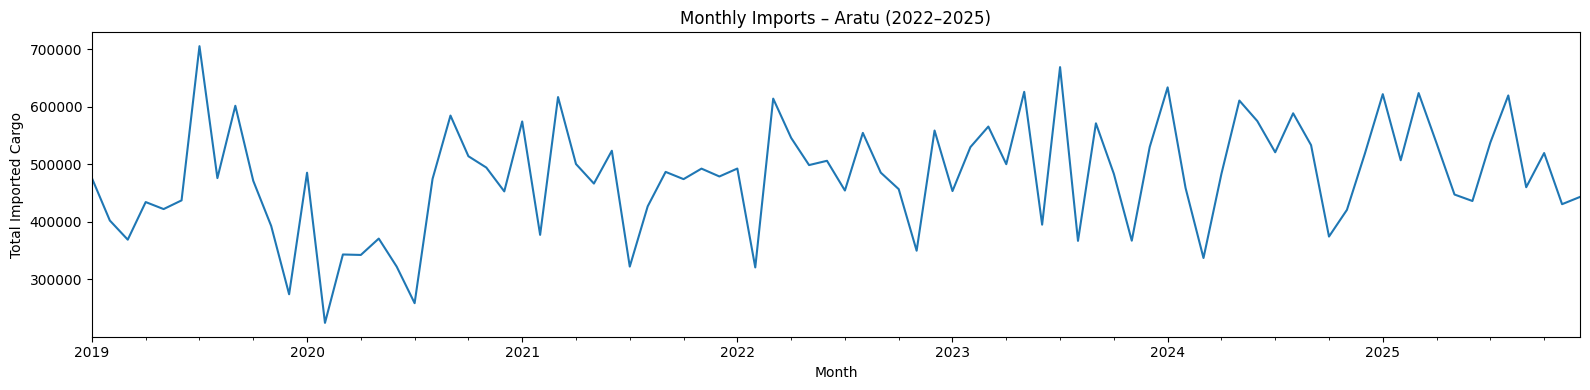

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Make sure date is datetime
Daily_Activity["date"] = pd.to_datetime(Daily_Activity["date"])

# 2) Filter to port + date range (2020-2025 inclusive)
port = "Aratu"
d = Daily_Activity.loc[
    (Daily_Activity["portname"] == port) &
    (Daily_Activity["date"].between("2019-01-01", "2025-12-31"))
].copy()

# 3) Monthly sum (month-end buckets)
monthly = (
    d.set_index("date")["import"]
     .resample("ME")
     .sum()
)

# 4) Plot
ax = monthly.plot(figsize=(16,4))
ax.set_title(f"Monthly Imports – {port} (2022–2025)")
ax.set_xlabel("Month")
ax.set_ylabel("Total Imported Cargo")
plt.tight_layout()
plt.show()


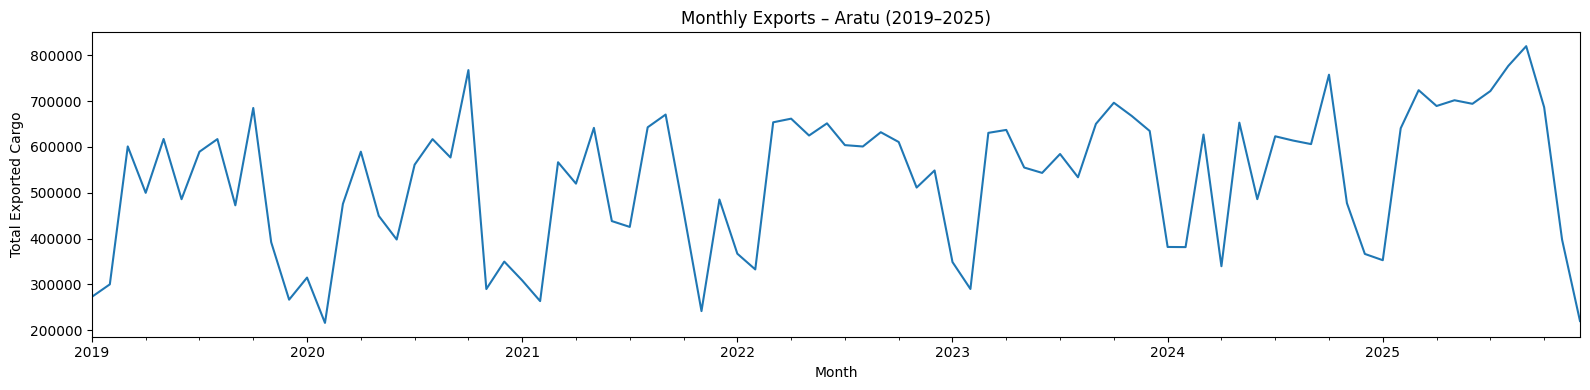

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Make sure date is datetime
Daily_Activity["date"] = pd.to_datetime(Daily_Activity["date"])

# 2) Filter to port + date range (2020-2025 inclusive)
port = "Aratu"
d = Daily_Activity.loc[
    (Daily_Activity["portname"] == port) &
    (Daily_Activity["date"].between("2019-01-01", "2025-12-31"))
].copy()

# 3) Monthly sum (month-end buckets)
monthly = (
    d.set_index("date")["export"]
     .resample("ME")
     .sum()
)

# 4) Plot
ax = monthly.plot(figsize=(16,4))
ax.set_title(f"Monthly Exports – {port} (2019–2025)")
ax.set_xlabel("Month")
ax.set_ylabel("Total Exported Cargo")
plt.tight_layout()
plt.show()

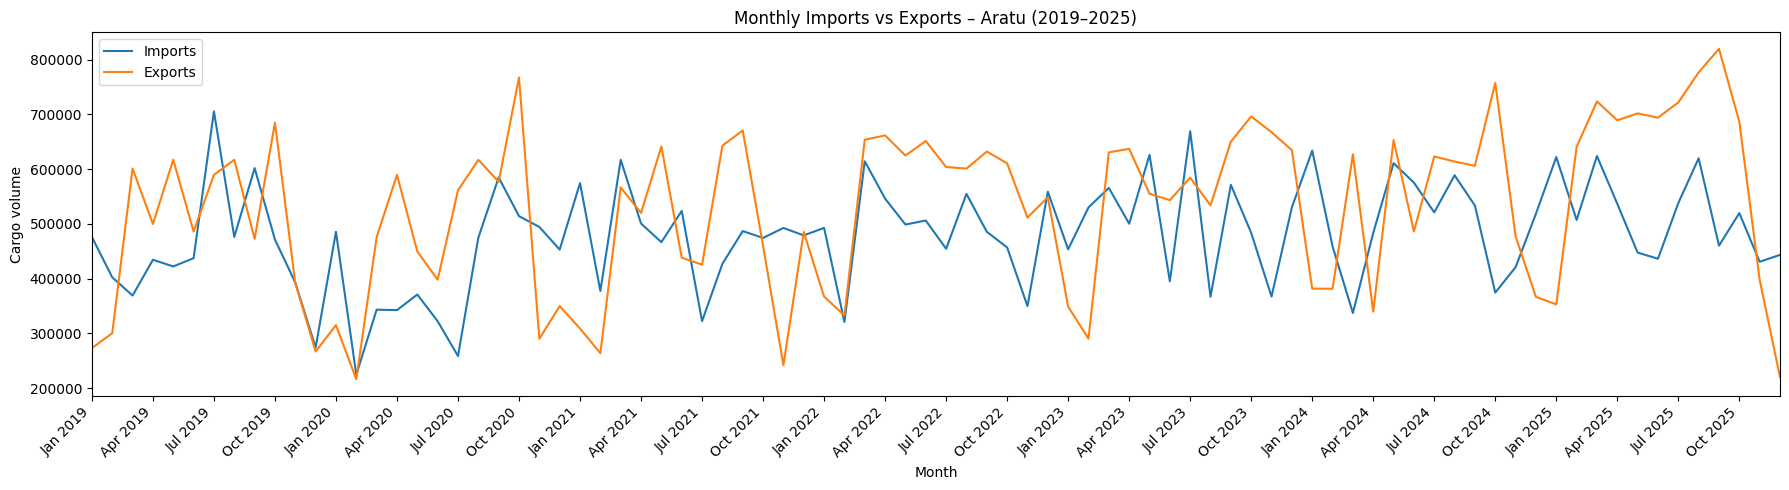

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

Daily_Activity["date"] = pd.to_datetime(Daily_Activity["date"], errors="coerce")
Daily_Activity = Daily_Activity.dropna(subset=["date"])

port = "Aratu"
d = Daily_Activity.loc[
    (Daily_Activity["portname"] == port) &
    (Daily_Activity["date"].between("2019-01-01", "2025-12-31"))
].copy()

d = d.set_index("date").sort_index()

imports_m = d["import"].resample("ME").sum()
exports_m = d["export"].resample("ME").sum()

monthly = pd.DataFrame({"Imports": imports_m, "Exports": exports_m}).fillna(0)

# Force datetime index
if isinstance(monthly.index, pd.PeriodIndex):
    monthly.index = monthly.index.to_timestamp()
else:
    monthly.index = pd.to_datetime(monthly.index)

ax = monthly.plot(figsize=(18,5))
ax.set_title(f"Monthly Imports vs Exports – {port} (2019–2025)")
ax.set_xlabel("Month")
ax.set_ylabel("Cargo volume")

# Label every 3 months with month name (and year to avoid ambiguity)
xticks = monthly.index[::3]
ax.set_xticks(xticks)
ax.set_xticklabels([dt.strftime("%b %Y") for dt in xticks], rotation=45, ha="right")
# If you truly want only the month name, use: dt.strftime("%b")

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
from scipy import stats

# Ensure datetime index
if isinstance(monthly.index, pd.PeriodIndex):
    monthly.index = monthly.index.to_timestamp()
else:
    monthly.index = pd.to_datetime(monthly.index)

# Rainy season: March–September
rainy_months = [3, 4, 5, 6, 7, 8, 9]

monthly["month"] = monthly.index.month
monthly["rainy"] = monthly["month"].isin(rainy_months)

# Split groups
rainy_imports = monthly.loc[monthly["rainy"], "Imports"]
dry_imports = monthly.loc[~monthly["rainy"], "Imports"]

rainy_exports = monthly.loc[monthly["rainy"], "Exports"]
dry_exports = monthly.loc[~monthly["rainy"], "Exports"]

# Welch’s t-test
import_test = stats.ttest_ind(rainy_imports, dry_imports, equal_var=False)
export_test = stats.ttest_ind(rainy_exports, dry_exports, equal_var=False)

print("IMPORTS:")
print("Rainy mean:", rainy_imports.mean())
print("Dry mean:", dry_imports.mean())
print("p-value:", import_test.pvalue)

print("\nEXPORTS:")
print("Rainy mean:", rainy_exports.mean())
print("Dry mean:", dry_exports.mean())
print("p-value:", export_test.pvalue)


IMPORTS:
Rainy mean: 493067.4410728951
Dry mean: 458929.11612990923
p-value: 0.10419557225212328

EXPORTS:
Rainy mean: 593913.7802279779
Dry mean: 436854.9714989164
p-value: 7.705053406374219e-06


In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ensure datetime index
monthly.index = pd.to_datetime(monthly.index)

# Add month column
monthly["month"] = monthly.index.month

# ----------------------
# IMPORTS ANALYSIS
# ----------------------
print("=== IMPORTS ANOVA ===")
model_imports = ols("Imports ~ C(month)", data=monthly).fit()
anova_imports = sm.stats.anova_lm(model_imports, typ=2)
print(anova_imports)

# Tukey post-hoc
tukey_imports = pairwise_tukeyhsd(
    endog=monthly["Imports"],
    groups=monthly["month"],
    alpha=0.05
)
print("\n=== IMPORTS TUKEY TEST ===")
print(tukey_imports)

# ----------------------
# EXPORTS ANALYSIS
# ----------------------
print("\n=== EXPORTS ANOVA ===")
model_exports = ols("Exports ~ C(month)", data=monthly).fit()
anova_exports = sm.stats.anova_lm(model_exports, typ=2)
print(anova_exports)

tukey_exports = pairwise_tukeyhsd(
    endog=monthly["Exports"],
    groups=monthly["month"],
    alpha=0.05
)
print("\n=== EXPORTS TUKEY TEST ===")
print(tukey_exports)


=== IMPORTS ANOVA ===
                sum_sq    df         F    PR(>F)
C(month)  1.185840e+11  11.0  1.169006  0.323729
Residual  6.639707e+11  72.0       NaN       NaN

=== IMPORTS TUKEY TEST ===
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
     1      2 -131079.0444 0.3252 -304463.9737   42305.885  False
     1      3  -38271.7221 0.9998 -211656.6514 135113.2073  False
     1      4  -56341.7344 0.9939 -229726.6638 117043.1949  False
     1      5  -42181.1389 0.9995 -215566.0682 131203.7905  False
     1      6  -77476.7994 0.9332 -250861.7288    95908.13  False
     1      7  -38495.0367 0.9998 -211879.9661 134889.8926  False
     1      8  -32905.6233    1.0 -206290.5527  140479.306  False
     1      9   -2015.2411    1.0 -175400.1704 171369.6883  False
     1     10  -63445.7561  0.984 -236830.6855 109939.1732  False
     1     

                 Imports        Exports
Month                                  
January    534165.626203  335437.997702
February   403086.581842  346545.513283
March      495893.904144  611325.400050
April      477823.891762  562565.142710
May        491984.487335  606286.757508
June       456688.826791  528261.241766
July       495670.589473  587218.833718
August     501260.002880  628992.243863
September  532150.385126  632746.841980
October    470719.870081  666347.069437
November   421303.608432  425539.673323
December   465369.894092  410404.603749


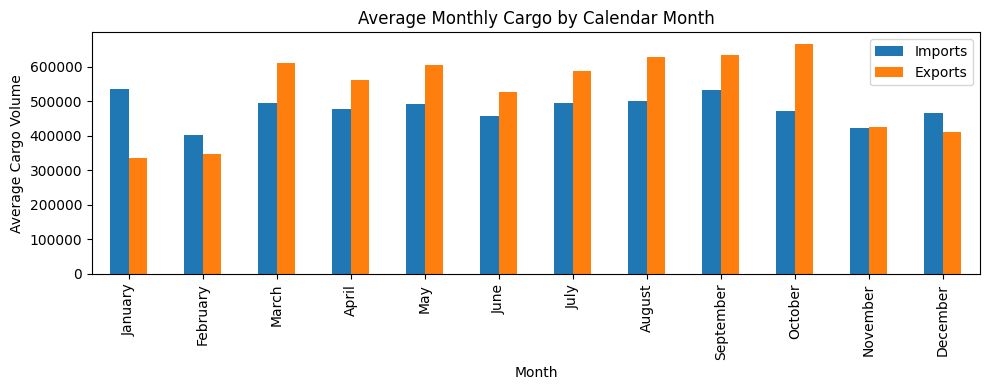

In [15]:
import calendar
import matplotlib.pyplot as plt

monthly.index = pd.to_datetime(monthly.index)
monthly["month"] = monthly.index.month

avg_by_month = monthly.groupby("month")[["Imports", "Exports"]].mean()

# sort by calendar month (1..12)
avg_by_month = avg_by_month.sort_index()

# replace 1..12 with month names
avg_by_month.index = avg_by_month.index.map(lambda m: calendar.month_name[m])
avg_by_month.index.name = "Month"

print(avg_by_month)

ax = avg_by_month.plot(kind="bar", figsize=(10, 4))
ax.set_ylabel("Average Cargo Volume")
ax.set_title("Average Monthly Cargo by Calendar Month")
plt.tight_layout()
plt.show()



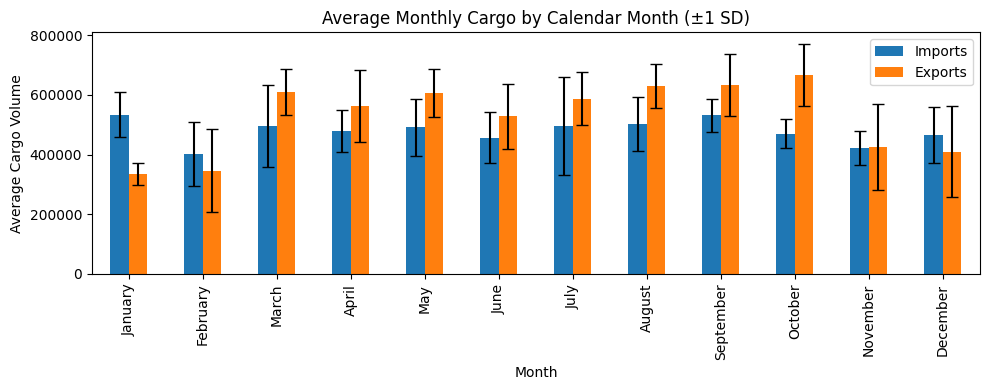

In [16]:
import calendar
import matplotlib.pyplot as plt

monthly.index = pd.to_datetime(monthly.index)
monthly["month"] = monthly.index.month

# mean + uncertainty (std) by calendar month
stats = monthly.groupby("month")[["Imports", "Exports"]].agg(["mean", "std"]).sort_index()

means = stats.xs("mean", axis=1, level=1)
stds  = stats.xs("std",  axis=1, level=1)

# month names on x-axis
means.index = means.index.map(lambda m: calendar.month_name[m])
stds.index  = stds.index.map(lambda m: calendar.month_name[m])
means.index.name = "Month"

ax = means.plot(kind="bar", yerr=stds, capsize=4, figsize=(10, 4))
ax.set_ylabel("Average Cargo Volume")
ax.set_title("Average Monthly Cargo by Calendar Month (±1 SD)")
plt.tight_layout()
plt.show()


In [17]:
import numpy as np

# (Assumes avg_by_month is already computed exactly as in your code, and indexed by month names)

# Ensure month order so slicing is deterministic
month_order = list(calendar.month_name)[1:]  # Jan..Dec
avg_by_month = avg_by_month.reindex(month_order)

march_oct_exports = avg_by_month.loc["March":"October", "Exports"].mean()

nov_feb_exports = avg_by_month.loc[["November", "December", "January", "February"], "Exports"].mean()

print(f"Average Exports (March–October): {march_oct_exports}")
print(f"Average Exports (November–February): {nov_feb_exports}")

# Average exports across all calendar months (i.e., mean of the 12 monthly means)
avg_exports_all_months = avg_by_month["Exports"].mean()

print(f"Average Exports (all months, over the whole period): {avg_exports_all_months}")



Average Exports (March–October): 602967.9413791355
Average Exports (November–February): 379481.947014336
Average Exports (all months, over the whole period): 528472.6099242023


In [18]:
Salvador_2025 = Daily_Activity.loc[(Daily_Activity["portid"] == "port944") & (Daily_Activity["year"] == 2025)]

In [19]:
Salvador_2025.head()

,date,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
1489600,2025-03-25,2025,3,25,port944,Port De Salvador,Brazil,BRA,1,0,...,0.000000,0.000000,5508.702585,0.0,0.000000,0.0,0.0,5508.702585,5508.702585,1489601
1489601,2025-03-26,2025,3,26,port944,Port De Salvador,Brazil,BRA,1,0,...,5190.950430,5190.950430,0.000000,0.0,6446.821136,0.0,0.0,6446.821136,6446.821136,1489602
1489602,2025-03-27,2025,3,27,port944,Port De Salvador,Brazil,BRA,2,0,...,763.593691,763.593691,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1489603
1489603,2025-03-28,2025,3,28,port944,Port De Salvador,Brazil,BRA,2,0,...,2021.811075,2021.811075,10447.604764,0.0,0.000000,0.0,0.0,10447.604764,10447.604764,1489604
1489604,2025-03-29,2025,3,29,port944,Port De Salvador,Brazil,BRA,1,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1489605


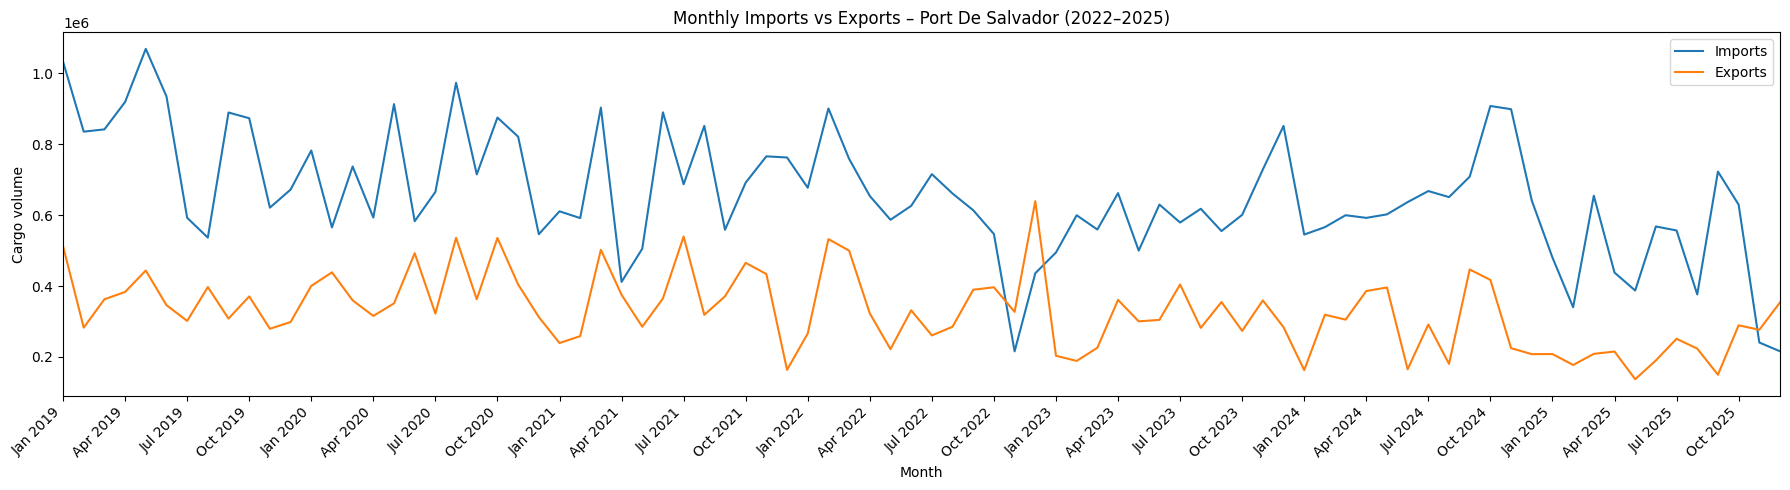

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Daily_Activity["date"] = pd.to_datetime(Daily_Activity["date"], errors="coerce")
Daily_Activity = Daily_Activity.dropna(subset=["date"])

port = "Port De Salvador"
d = Daily_Activity.loc[
    (Daily_Activity["portname"] == port) &
    (Daily_Activity["date"].between("2019-01-01", "2025-12-31"))
].copy()

d = d.set_index("date").sort_index()

imports_m = d["import"].resample("ME").sum()
exports_m = d["export"].resample("ME").sum()

monthly = pd.DataFrame({"Imports": imports_m, "Exports": exports_m}).fillna(0)

# Force datetime index
if isinstance(monthly.index, pd.PeriodIndex):
    monthly.index = monthly.index.to_timestamp()
else:
    monthly.index = pd.to_datetime(monthly.index)

ax = monthly.plot(figsize=(18,5))
ax.set_title(f"Monthly Imports vs Exports – {port} (2022–2025)")
ax.set_xlabel("Month")
ax.set_ylabel("Cargo volume")

# Label every 3 months with month name (and year to avoid ambiguity)
xticks = monthly.index[::3]
ax.set_xticks(xticks)
ax.set_xticklabels([dt.strftime("%b %Y") for dt in xticks], rotation=45, ha="right")
# If you truly want only the month name, use: dt.strftime("%b")

plt.tight_layout()
plt.show()
